In [11]:
# California dataset
import numpy as np
from numpy.linalg import eig
from numpy.linalg import norm
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix

data = open('pageRank-gr0.California.txt', 'r')

edge_list = np.empty((16150, 2),dtype=int)

row = np.empty(16150,dtype=int)
col = np.empty(16150,dtype=int)
m_data = np.empty(16150,dtype=int)

In [12]:
# Reading data and creating edge list
a = True
i = 0
while a:
    data_line = data.readline()
    if not data_line:
        print("eof")
        a = False
        break
    if data_line[0] == 'e':
        t = data_line.split()
        edge_list[i][0] = t[1]
        edge_list[i][1] = t[2]
        i = i + 1

eof


In [13]:
# Creating sparse link matrix, binary
for i in range(len(edge_list)):
    col[i] = edge_list[i][0]
    row[i] = edge_list[i][1]
    m_data[i] = 1

In [14]:
Q = csr_matrix((m_data, (row, col)), shape=(9664, 9664))

In [15]:
c_sum=Q.sum(axis=0)
csr_sum=csr_matrix(c_sum, dtype=float)
for x in range(len(csr_sum.data)):
        csr_sum.data[x]=1/csr_sum.data[x]

In [16]:
Q = Q.multiply(csr_sum) # Making matrix column stochastic

In [17]:
epsilon = 10e-5
residual = 1
z = np.ones(Q.shape[1]) / (Q.shape[1])
v = np.ones(Q.shape[1]) / (Q.shape[1])
alpha = 0.85
res = 1
residuals = []

In [18]:
while res > epsilon:
    yhat = alpha * Q * z
    beta = 1 - np.linalg.norm(yhat, ord=1)
    y = yhat + beta * v
    res = np.linalg.norm(y - z, ord=1)
    z = y

<Figure size 432x288 with 0 Axes>

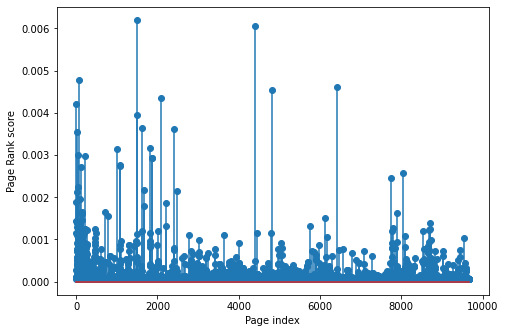

0.00620092201592269
0.00620092201592269
(array([1488], dtype=int64),)
(array([4391], dtype=int64),)
(array([66], dtype=int64),)


In [26]:
import matplotlib.pyplot as plt
plt.clf()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
y = z
ax.set_ylabel('Page Rank score')
ax.set_xlabel('Page index')
ax.stem(y)
plt.show()

y_sort = -np.sort(-y)
print(y_sort[0])
print(max(y))
print(np.where(y == y_sort[0]))
print(np.where(y == y_sort[1]))
print(np.where(y == y_sort[2]))

# Compared with googling "California"
# 1. http://www.ucdavis.edu/ 2nd page of search results
# 2. http://search.ucdavis.edu/ The search page of the highest ranked web-page.
# 3. http://www.california.edu/ Not in the first 5 pages of search results, deprecated

# fig2 = plt.figure()
# ax2 = fig2.add_axes([0, 0, 1, 1])
# x2 = np.arange(36)
# y2 = residuals
# ax2.set_ylabel('Residual')
# ax2.set_xlabel('Iteration')
# ax2.plot(x2,y2)
# plt.show()